In [2]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using Meshes
using Distances
using Random
using GeoTables
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using ProgressMeter
using Unitful
using JLD2
using Plots
using DataStructures
using POMDPs
using ParticleFilters
using LinearAlgebra
include("../src/config.jl");
include("../src/pomdp.jl")
pomdp = CCSPOMDP();

FEATURE = :topSealThickness


:topSealThickness

In [12]:
visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [13]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -301.5217196502764


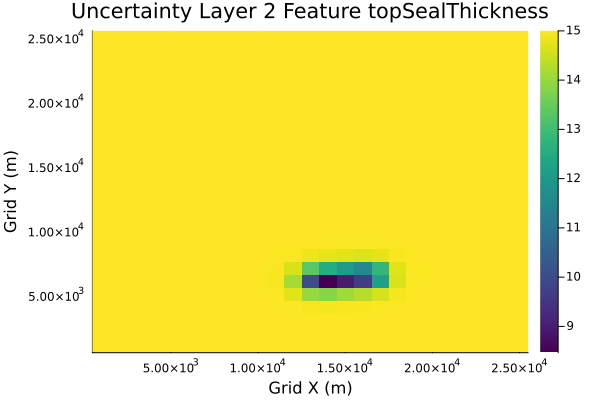

In [14]:
# Taking a seismic line action first
distr = POMDPs.observation(pomdp, all_actions[21], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[21])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

In [15]:
pomdp.rocktype_belief

5-element Vector{Categorical{Float64, Vector{Float64}}}:
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [16]:
distr = POMDPs.observation(pomdp, all_actions[2], pomdp.state);
pomdp.rocktype_belief

5-element Vector{Categorical{Float64, Vector{Float64}}}:
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])

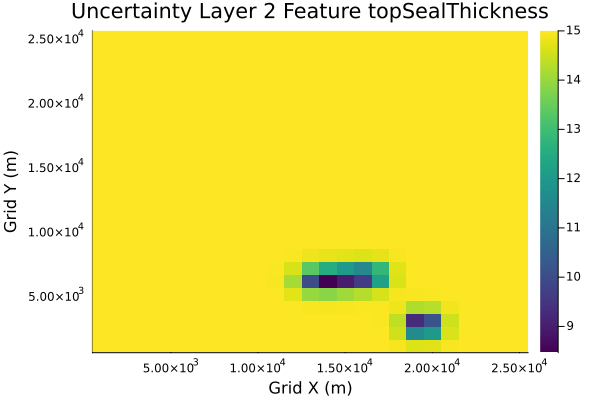

In [17]:
visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: 11.368614669168757


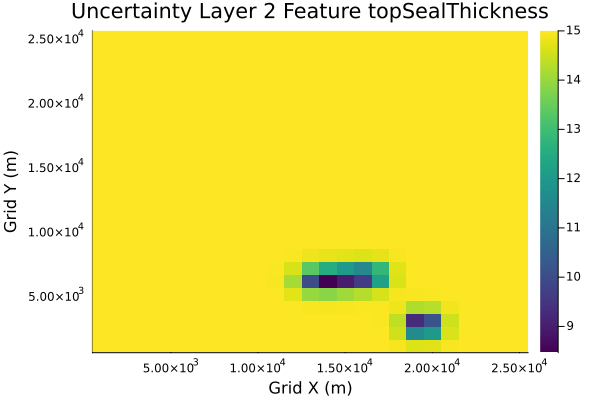

In [18]:
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[2])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -3.207857139621197


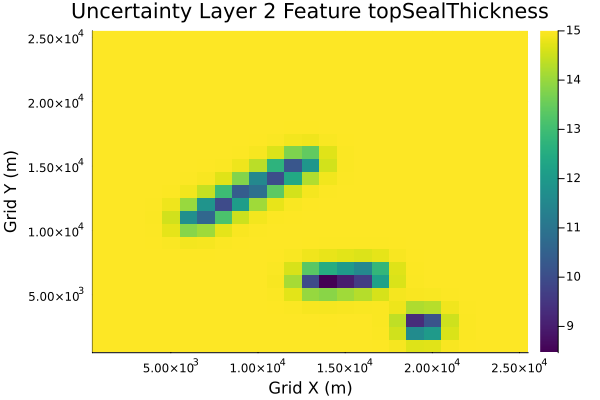

In [19]:
# Timing test for seismic line observation and reward function
distr = POMDPs.observation(pomdp, all_actions[19], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[19])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -2.4796004256057884


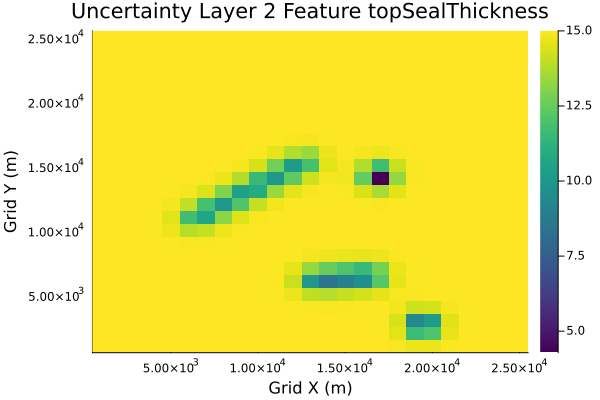

In [20]:
# Timing test for well log observation and reward function
distr = POMDPs.observation(pomdp, all_actions[1], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[1])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)